In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import numpy as np
import torch
from nn_magnetics.data import simulate_demag
from nn_magnetics.utils.physics import demagnetizing_factor
from nn_magnetics.predictions import B
from nn_magnetics.utils.metrics import relative_amplitude_error, angle_error

In [42]:
dimension = np.array((5, 5, 5)) * 1e-3
polarization = np.array((0, 0, 1.2))
susceptibility = np.array((0, 0, 0))
position = np.array((0,0,0))

In [43]:
from nn_magnetics.optimize.fit import prepare_measurements_mock, prepare_measurements

points, _, B_measured, _ = prepare_measurements(path="../scans/")

/Users/jacksmith/Documents/PhD/nn-magnetics/.venv/lib/python3.12/site-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=5950390928) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()
/Users/jacksmith/Documents/PhD/nn-magnetics/.venv/lib/python3.12/site-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=5950436368) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()


In [44]:
points.shape, B_measured.shape

((75, 3), (75, 3))

In [45]:
B_predicted = B(
    position=position,
    dimension=dimension,
    polarization=polarization,
    susceptibility=susceptibility,
    points=points,
    model_path="/Users/jacksmith/Documents/PhD/nn-magnetics/results/3dof_chi/2025-01-29 11:16:46.147493/best_weights.pt",
)

In [46]:
relative_amp_err = relative_amplitude_error(torch.from_numpy(B_measured), torch.from_numpy(B_predicted), return_abs=True)
angle_err = angle_error(torch.from_numpy(B_measured), torch.from_numpy(B_predicted))

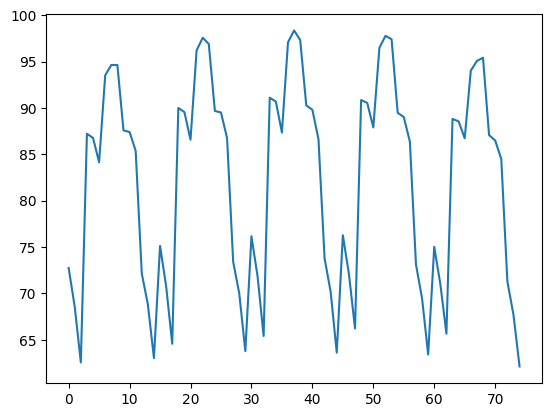

In [47]:
import matplotlib.pyplot as plt


plt.plot(relative_amp_err)
plt.show()